In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import statistics

### Descriptions of variables
- gender: the gender of the student (categorical)
- groups: which group are they on (categorical)
- parent level of education: the level of education of the parents (categorical)
- lunch: did they eat a lunch before the test (categorical)
- test preparation course: did they attend to the test preparation course (categorical)
- math score: the score of the math exam (numerical)
- reading score: the score of the reading exam  (numerical)
- writing score: the score of the writing exam  (numerical)

In [8]:
df= pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,groups,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# As a student we all want to know how to get the highest scores we can get so we would like to know if we took a certain rute would we have a higher percentage of having a good score 

# 1st Question is can we know the avergae score in total out of all participants and if so if we boxplot it will there be outliers?

In [9]:
df['avg'] = df[['math score','reading score','writing score']].mean(axis=1)
df

,gender,groups,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


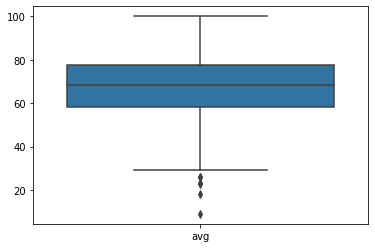

In [10]:
sns.boxplot(data = df.loc[:,
                          ['avg']
                         ]
           )

### the mean of the class passed which means most of the class passed but there are a few students who had really bad scores and are outliers

# 2. which one was the hardest test by the aproval rate of each one?

In [11]:
def custom_cls(x):
    if (0<= x <=59):
        return 'fail'
    else:
        return 'pass'

In [12]:
df['math test'] = df.apply(lambda tbl: custom_cls(tbl['math score']), axis=1)
df['reading test'] = df.apply(lambda tbl: custom_cls(tbl['reading score']), axis=1)
df['writing test'] = df.apply(lambda tbl: custom_cls(tbl['writing score']), axis=1)
df.head(2)

,gender,groups,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg,math test,reading test,writing test
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,pass,pass,pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,pass,pass,pass


In [13]:
countmath = df['math test'].value_counts()
countmath = countmath.to_frame()
countmath['%'] = (countmath.loc[:,:]/countmath.loc[:,'math test'].sum(axis=0))*100
countmath

,math test,%
pass,677,67.7
fail,323,32.3


In [14]:
countread = df['reading test'].value_counts()
countread = countread.to_frame()
countread['%'] = (countread.loc[:,:]/countread.loc[:,'reading test'].sum(axis=0))*100
countread

,reading test,%
pass,746,74.6
fail,254,25.4


In [15]:
countwrite = df['writing test'].value_counts()
countwrite = countwrite.to_frame()
countwrite['%'] = (countwrite.loc[:,:]/countwrite.loc[:,'writing test'].sum(axis=0))*100
countwrite

,writing test,%
pass,719,71.9
fail,281,28.1


Text(0.5, 1.0, 'reading')

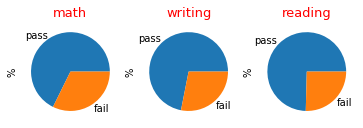

In [16]:
fig = plt.subplot(1,3,1)
countmath['%'].plot(kind = 'pie')
plt.title('math',fontsize =13, color = 'red')

fig2 = plt.subplot(1,3,2)
countwrite['%'].plot(kind = 'pie')
plt.title('writing',fontsize =13, color = 'red')

fig3 = plt.subplot(1,3,3)
countread['%'].plot(kind = 'pie')
plt.title('reading',fontsize =13, color = 'red')

### the hardest test out of all 3 of them was the math test

# 3. Which affected most the scores: the gender of the participants, if they had a full lunch before hand, or if they had the test preparation.

In [17]:
piv= pd.pivot_table(df,
                         index = ['lunch'],
                         values = ['avg'],
                         aggfunc = ['mean'],
                         margins = True
                        )
piv

,mean
,avg
lunch,
free/reduced,62.199061
standard,70.837209
All,67.770667


In [18]:
piv= pd.pivot_table(df,
                         index = ['test preparation course'],
                         values = ['avg'],
                         aggfunc = ['mean'],
                         margins = True
                        )
piv

,mean
,avg
test preparation course,
completed,72.669460
none,65.038941
All,67.770667


### it is more important to eat a full lunch before the test than to take the test preparation course but both of them affect the students 

# 4. Out of male and female test takers what is the level of education do they parents have and can we show it graphically?
## if so does the level of education of the parents  affect the outcome of the children

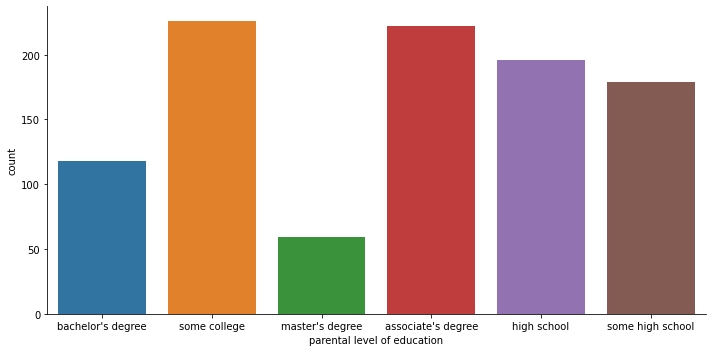

In [19]:
plot_order = ['some high school','high school',"associate's degree",'some college',"bachelor's degree","master's degree"]
g = sns.catplot(x = 'parental level of education',
                kind= 'count',
                data= df,
                height=5, aspect=2,
               )

In [20]:
piv= pd.pivot_table(df,
                         index = ['parental level of education'],
                         values = ['avg'],
                         aggfunc = ['mean'],
                         margins = True
                        )
piv

,mean
,avg
parental level of education,
associate's degree,69.569069
bachelor's degree,71.923729
high school,63.096939
master's degree,73.598870
some college,68.476401
some high school,65.108007
All,67.770667


### most parents at least tried college and that affected the children as well making it so that if your parents did at least some college it is more probable to achive a better grade

# 5 if you do good in one test does it mean you will do good on the other or in other words do the test have correlation between them?
and if so which 2 test have the strongest correlation

In [21]:
df.corr()

,math score,reading score,writing score,avg
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
avg,0.918746,0.970331,0.965667,1.000000


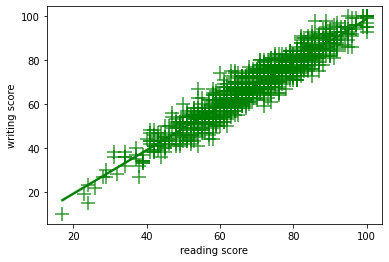

In [22]:
x = df['reading score']
y = df['writing score']
modelA = sm.OLS.from_formula('y ~ x' , data = df)
resultA = modelA.fit()
resultA.summary()
ax= sns.regplot(x=x,
               y=y,
               data=df,
               color = 'green',
                marker= '+',
                scatter_kws={'s':200},
              )

### the 2 test with the most correlation between them are writing and reading wo if you study for one of them you will probably get a better grade on the other one

# 6. Does the which group did better?

In [50]:
piv= pd.pivot_table(df,
                         index = ['groups'],
                         values = ['avg'],
                         aggfunc = ['mean'],
                         margins = True
                        )
piv

,mean
,avg
groups,
group A,62.992509
group B,65.468421
group C,67.131661
group D,69.179389
group E,72.752381
All,67.770667


### the group with the best score are group E

# Conclusion

## To get the best grades it is best to:
    - be in group E
    - have parents that at least enter college
    - eat a full lunch before the exam
    - take the course prep for the exam
    - study for math the hardest because it is the hardest out of all exams
    - know that if you study either for writing or reading they have the most correlation so if you pass one you will probably pass the otherone